In [38]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [39]:
cars = pd.read_csv("final_cars.csv")

In [40]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [41]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [42]:
X.shape,y.shape

((201, 16), (201,))

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [46]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]}")

engine-size               95.49343491709142
horsepower                34.69269675189038
city-mpg                  145.06541216638104
highway-mpg               -328.2991753492577
fuel-type_diesel          1990.029517120534
fuel-type_gas             -1990.0295171205366
num-of-doors_four         117.4656698135416
num-of-doors_two          -117.465669813542
body-style_convertible    1763.0705844398487
body-style_hardtop        256.9173794656706
body-style_hatchback      -1332.5103614254808
body-style_sedan          247.5600540111192
body-style_wagon          -935.0376564911578
drive-wheels_4wd          -980.2587279477342
drive-wheels_fwd          -332.426893173478
drive-wheels_rwd          1312.6856211212128


In [48]:
model.intercept_

5554.702541963157

In [49]:
y_pred = model.predict(X_test)

In [50]:
np.mean(y_pred - y_test)

-412.10832867629716

In [51]:
model.score(X_test,y_test)

0.7985835208851861

In [52]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 15261385.41
Mean Absolute Error : 2883.21
R2 Score: 0.80


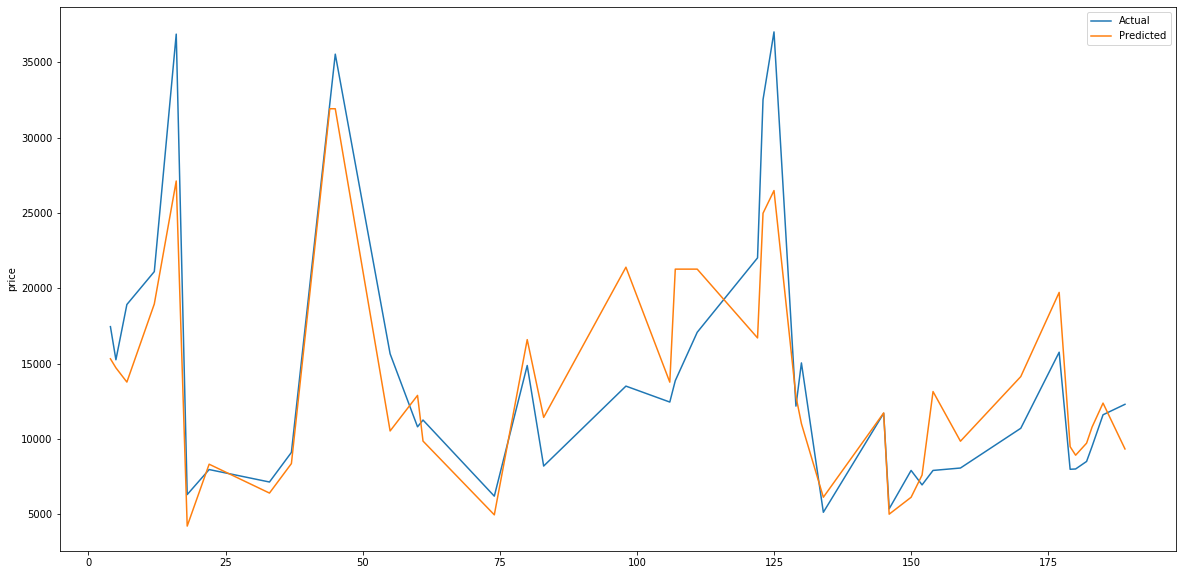

In [53]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [54]:
for p,a in zip(y_pred,y_test):
    print(f"{p:.2f} {a:.2f}")

4200.79 6295.00
14132.27 10698.00
21269.81 13860.00
21398.40 13499.00
19723.35 15750.00
9709.53 8495.00
14714.41 15250.00
4992.23 5348.00
18955.12 21105.00
7589.01 6938.00
9847.71 11245.00
26488.71 37028.00
8909.87 7995.00
13137.85 7898.00
16586.75 14869.00
13766.74 18920.00
6394.10 7129.00
11007.17 15040.00
8353.01 9095.00
4948.43 6189.00
10778.15 9495.00
11716.65 11694.00
31923.90 35550.00
9839.02 8058.00
12881.65 10795.00
24982.56 32528.00
9474.60 7975.00
12369.87 11595.00
16700.11 22018.00
31923.90 32250.00
27124.58 36880.00
10520.54 15645.00
6114.38 7898.00
21269.81 17075.00
8311.88 7957.00
9325.78 12290.00
12822.17 12170.00
15314.80 17450.00
11421.49 8189.00
13761.25 12440.00
6117.19 5118.00


In [55]:
X[['engine-size','horsepower']].corr()

,engine-size,horsepower
engine-size,1.000000,0.822167
horsepower,0.822167,1.000000


In [56]:
X[['city-mpg','highway-mpg']].corr()

,city-mpg,highway-mpg
city-mpg,1.000000,0.972044
highway-mpg,0.972044,1.000000


### Micro model with 3 features 

In [57]:
# Micro model
X_micro =  X[['engine-size','horsepower','city-mpg']]
y_micro =  y

In [58]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [59]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7765015468308566

In [61]:
y_micro_pred = micro_model.predict(X_micro_test)

In [62]:
from sklearn.metrics import r2_score
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.82


## RandomForestRegressor 

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.9772260873751211
R2 Score: 0.93


e:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


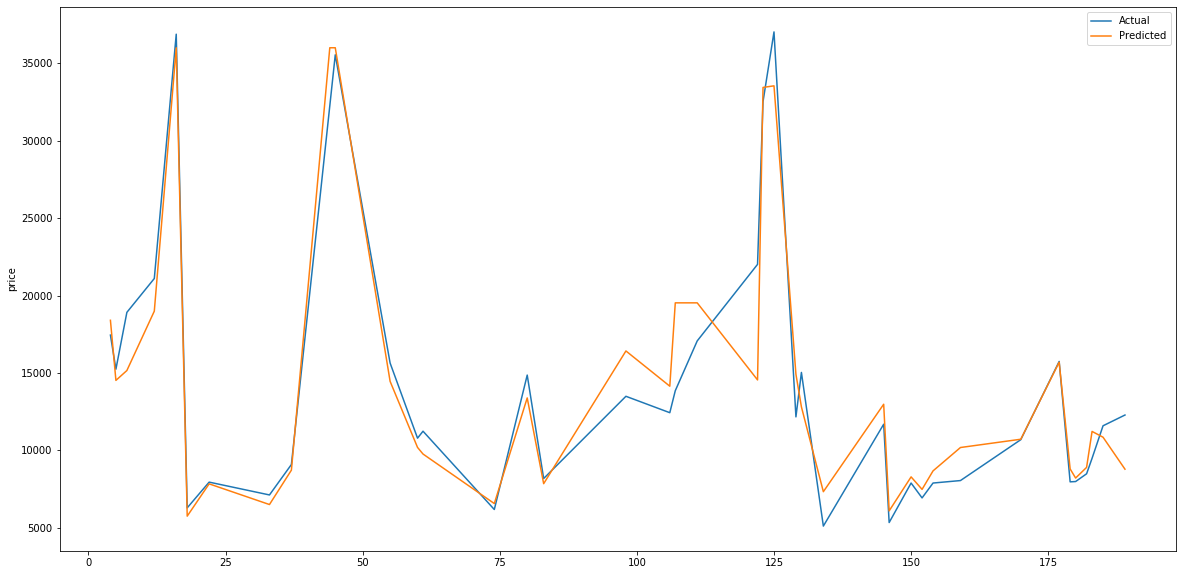

In [65]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [97]:
cars = pd.read_csv("final_cars.csv")

In [98]:
from sklearn.linear_model import SGDRegressor

In [99]:
cars.head()

,engine-size,horsepower,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [100]:
# create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [101]:
## scale values
from sklearn.preprocessing import scale
X['engine-size'] = scale(X['engine-size'])
X['horsepower'] = scale(X['horsepower'])
X['city-mpg'] = scale(X['city-mpg'])
X['highway-mpg'] = scale(X['highway-mpg'])

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [103]:
model = SGDRegressor(random_state=100)
model.fit(X_train,y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.8260006054363602
R2 Score: 0.80


In [104]:
for t in zip(y_test,y_pred):
    print(t)

(6295.0, 4263.098425071112)
(10698.0, 12850.680342098283)
(13860.0, 20250.20288777954)
(13499.0, 21100.563763725222)
(15750.0, 19821.693156414654)
(8495.0, 9863.644647468653)
(15250.0, 14839.213004280005)
(5348.0, 4986.850989202901)
(21105.0, 19663.41822543165)
(6938.0, 7836.861082550077)
(11245.0, 9817.75262565415)
(37028.0, 24678.89766887282)
(7995.0, 8609.997513769908)
(7898.0, 11942.333275220186)
(14869.0, 16229.221087286212)
(18920.0, 13734.804155179918)
(7129.0, 6189.09054671481)
(15040.0, 10998.969942167507)
(9095.0, 8431.373655679588)
(6189.0, 5235.971704736604)
(9495.0, 9781.812023605191)
(11694.0, 10437.50529958781)
(35550.0, 32402.46440539986)
(8058.0, 10551.331036739874)
(10795.0, 12261.18837433054)
(32528.0, 24587.547207484335)
(7975.0, 9848.553381920114)
(11595.0, 10192.700361203435)
(22018.0, 17241.84934878419)
(32250.0, 32402.46440539986)
(36880.0, 27257.29384827056)
(15645.0, 10372.687300743444)
(7898.0, 5911.718414543523)
(17075.0, 20250.20288777954)
(7957.0, 8090.308

## Lasoo 

In [39]:
from sklearn.linear_model import LassoCV

In [40]:
model = LassoCV(cv=5)
model.fit(X_train,y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.7995214551898788
R2 Score: 0.82
